In [56]:
!pip install kaggle

In [57]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jasmine163","key":"165d6d8f52f1caf72e13a9cd13f7178c"}'}

In [58]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [59]:
!cp kaggle.json ~/.kaggle/

In [60]:
!chmod 600 ~/.kaggle/kaggle.json

In [61]:
! kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           6574        153  1.0              
saimondahal/life-expectancy-trends-for-males-and-females           Life Expectancy Trends for Males and Females       263KB  2024-01-28 09:26:09            737         28  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          12858        236  1.0              
yashusinghal/electric-vehicle-population-dataset  

In [62]:
!kaggle datasets download -d jainilcoder/online-payment-fraud-detection

online-payment-fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [63]:
!unzip online-payment-fraud-detection.zip

Archive:  online-payment-fraud-detection.zip
replace onlinefraud.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: onlinefraud.csv         


In [64]:
import pandas as pd
import numpy as np

In [65]:
data= pd.read_csv("/content/online-payment-fraud-detection.zip")
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [66]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [68]:
duplicates_info = data[data.duplicated()]
print(duplicates_info)

Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [69]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


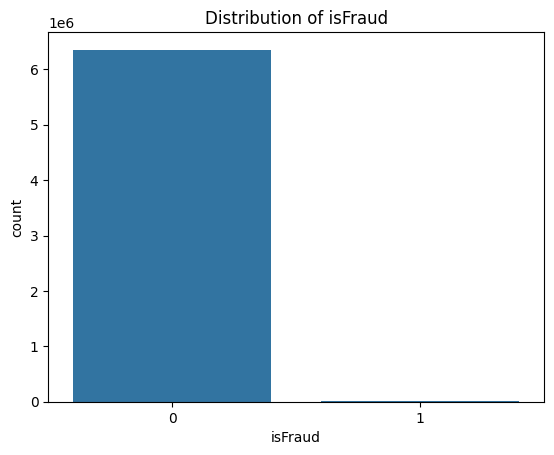

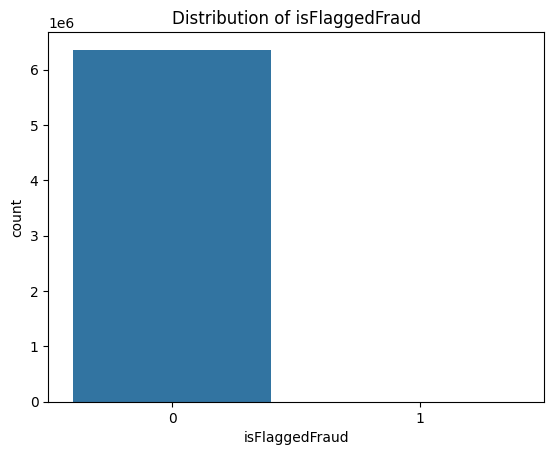

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'isFraud' and 'isFlaggedFraud'
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of isFraud')
plt.show()

sns.countplot(x='isFlaggedFraud', data=data)
plt.title('Distribution of isFlaggedFraud')
plt.show()


In [71]:
data.drop('isFlaggedFraud',inplace=True,axis=1)

In [72]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [73]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))
print(object_cols)
print(num_cols)
print(fl_cols)

Categorical variables: 3
Integer variables: 2
Float variables: 5
['type', 'nameOrig', 'nameDest']
['step', 'isFraud']
['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


<Axes: xlabel='type', ylabel='count'>

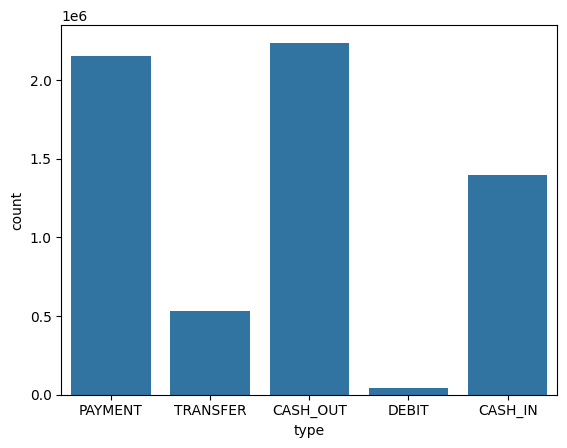

In [74]:
sns.countplot(x='type', data=data)

In [75]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [76]:
type_counts = data['type'].value_counts()


In [77]:
# Accessing the transaction types and their quantities
transaction = type_counts.index
quantity = type_counts.values

In [78]:
import plotly.express as px
figure = px.pie(data, values = quantity, names = transaction, hole = 0.5, title = "Distribution of Transaction type")
figure.show()

In [79]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [80]:
type = data['type'].value_counts()
type

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [81]:
corr = data.corr()
corr

<ipython-input-81-df690e1cacaf>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


In [82]:
data['type'] = data['type'].map({'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5})

In [83]:
data['isFraud'] = data['isFraud'].map({0:'No_Fraud', 1:'Fraud'})

In [84]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No_Fraud
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No_Fraud
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No_Fraud


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = np.array(data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']])

In [87]:
y = np.array(data[['isFraud']])

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [90]:
model_dt = DecisionTreeClassifier()

In [91]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
model_dt.score(X_test, y_test)

0.999677805683822

In [93]:
data = np.array([[1, 181, 181, 0.0]])
model_dt.predict(data)

array(['Fraud'], dtype=object)

In [94]:
data1 = np.array([[1, 229133.9, 15325, 0.0]])
model_dt.predict(data1)

array(['No_Fraud'], dtype=object)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = model_dt.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:")
print(report)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Precision, Recall, and F1-score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
accuracy = model_dt.score(X_test, y_test)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)

Classification Report:
{'Fraud': {'precision': 0.8882646691635455, 'recall': 0.8603385731559855, 'f1-score': 0.874078624078624, 'support': 1654}, 'No_Fraud': {'precision': 0.9998182421895285, 'recall': 0.9998591516048062, 'f1-score': 0.9998386964787048, 'support': 1270870}, 'accuracy': 0.999677805683822, 'macro avg': {'precision': 0.9440414556765371, 'recall': 0.9300988623803959, 'f1-score': 0.9369586602786644, 'support': 1272524}, 'weighted avg': {'precision': 0.999673247195497, 'recall': 0.999677805683822, 'f1-score': 0.9996752361748128, 'support': 1272524}}

Confusion Matrix:
[[   1423     231]
 [    179 1270691]]

Precision: 0.999673247195497
Recall: 0.999677805683822
F1 Score: 0.9996752361748128
Accuracy: 0.999677805683822


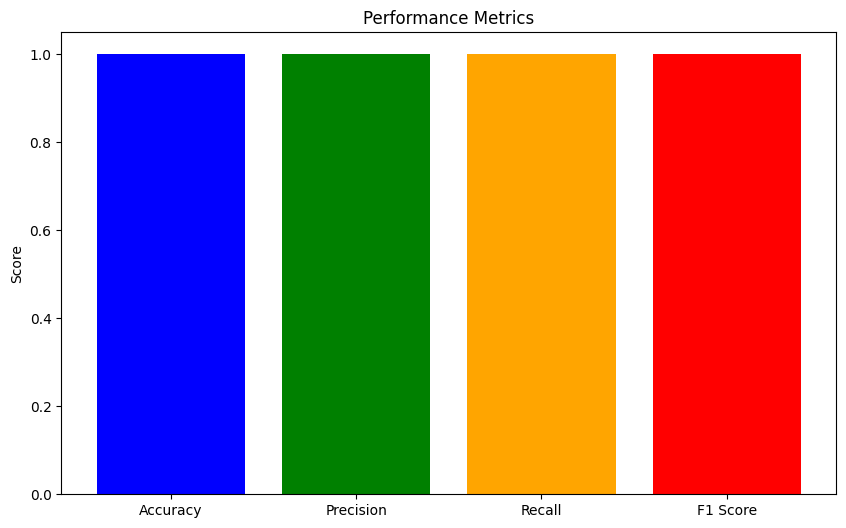

In [96]:
import matplotlib.pyplot as plt

# Assuming 'report' and 'conf_matrix' are already generated
accuracy = model_dt.score(X_test, y_test)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

# Create histograms
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()